In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types



Welcome to JupyROOT 6.26/04


In [2]:

base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_sigbkg/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [92]:
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 &&  Dstarp_CMS_p>2.5'

# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter += '&& gamma_E>0.45'
base_filter=' D0_M>1.8 && D0_M<1.9'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 &&  Dstarp_CMS_p>2.5'



# base_filter=' D0_M>1.68 && D0_M<2.05 && Belle2Pi0Veto_75MeV >0.023'
base_filter=' D0_M>1.68 && D0_M<2.05 '

# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'

# base_filter='D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.0005 && Dstarp_CMS_p>2.5 && gamma_E>0.52 && Belle2Pi0Veto_75MeV>0.023'


variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','rho_rank_Dstp','D0_M','D0_cosHel_0','Rho_M','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','Dstarp_flightDistance','Dstarp_flightDistanceErr','D0_flightDistance','D0_flightDistanceErr','Rho_p','Rho_CMS_p','Dstarp_chiProb']
# variables+=['Pi0_Prob','Eta_Prob']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['phi_MVA2']
variables += ['roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV', \
            'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']

# variables+=['phi_MVA2']

variables+=['pi0_cos_daughterAngle_mask','pi0_daughterAngle_mask','pi0_daughterAngle_75MeV','pi0_cos_daughterAngle_75MeV','pi0_momentum_75MeV','pi0_veto_isSignal_75MeV']

tree='rho'

In [94]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [263]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)

In [264]:
# pd_ccbar = pd_ccbar.query('__candidate__==0')

In [265]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uubar['rank'] = pd_uubar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ddbar['rank'] = pd_ddbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ssbar['rank'] = pd_ssbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_taupair['rank'] = pd_taupair.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')

In [266]:
multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

48083
48626
0.9888331345370789


In [267]:
# pd_ccbar['rank'].describe()

In [268]:
# len(pd_ccbar.query('__candidate__==0'))

In [269]:
# len(pd_ccbar.query('rank==1'))

In [270]:
# len(pd_ccbar.query('rank!=1'))

In [271]:
# len(pd_uubar.query('rank!=1'))

In [272]:
# len(pd_ccbar)

In [273]:
# def cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair):
#     pd_ccbar_after = pd_ccbar.query(cut)
#     pd_uubar_after = pd_uubar.query(cut)
#     pd_ddbar_after = pd_ddbar.query(cut)
#     pd_ssbar_after = pd_ssbar.query(cut)
#     pd_charged_after = pd_charged.query(cut)
#     pd_mixed_after = pd_mixed.query(cut)
#     pd_taupair_after = pd_taupair.query(cut)

#     return pd_ccbar_after, pd_uubar_after , pd_ddbar_after , pd_ssbar_after , \
#         pd_charged_after , pd_mixed_after , pd_taupair_after

In [274]:
cut = 'gamma_E>0.48 & Belle2Pi0Veto_mask>0.25'
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'

cut = 'gamma_E>0.0'

cut = 'pi0_veto_isSignal_75MeV !=1 & pi0_cos_daughterAngle_75MeV<0.6'
cut = 'gamma_genMotherPDG==111 &  pi0_cos_daughterAngle_75MeV<0.6 '
# cut = 'pi0_veto_isSignal_mask !=1 '

# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'gamma_E>0.48 '
# cut = 'rank==1 '

# cut = 'D0_M>1.8 & D0_M<1.9'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[150. 154. 146. 127. 161. 147. 146. 202. 157. 153. 174. 159. 174. 188.
 198. 218. 217. 285. 319. 418. 484. 594. 549. 529. 362. 237. 148.  77.
  65.  59.  61.  60.  42.  48.  52.  53.  51.  51.  49.  31.  51.  38.
  56.  36.  34.  48.  44.  35.  56.  44.]
fitst_bin_entries=150.0


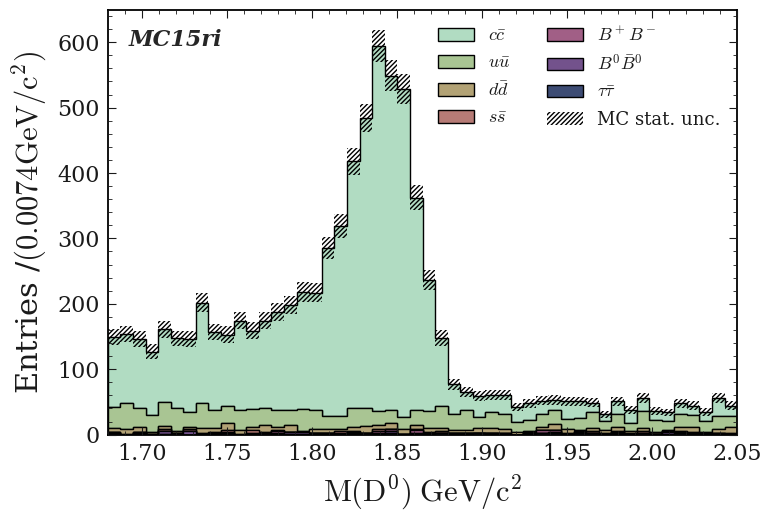

In [275]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")
plt.savefig("MC15ri_rho_1ab_optimized_D0.png")

[7.759e+03 1.760e+02 2.000e+00 0.000e+00 0.000e+00]
fitst_bin_entries=7759.0


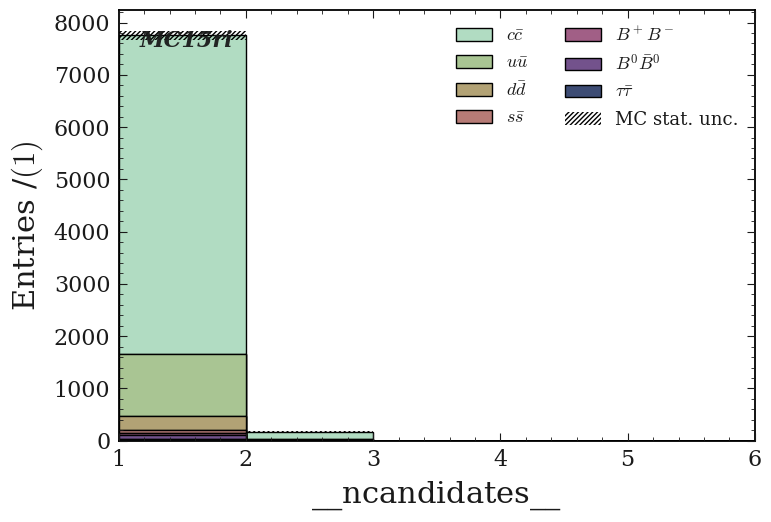

In [276]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = '__ncandidates__'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1,6)
force_range = (1,6)
# xrange = (1.8,1.9)

nbins = 5
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range)
plt.savefig("MC15ri_rho_1ab_optimized_ncandidates.png")

[ 86.  86.  86. 119.  98.  84.  94.  95. 110. 108. 107.  99. 114.  99.
 100. 126. 113. 131. 128. 154. 119. 158. 157. 155. 165. 172. 196. 210.
 259. 227. 248. 271. 342. 316. 340. 392. 427. 485. 582. 579.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]
fitst_bin_entries=86.0


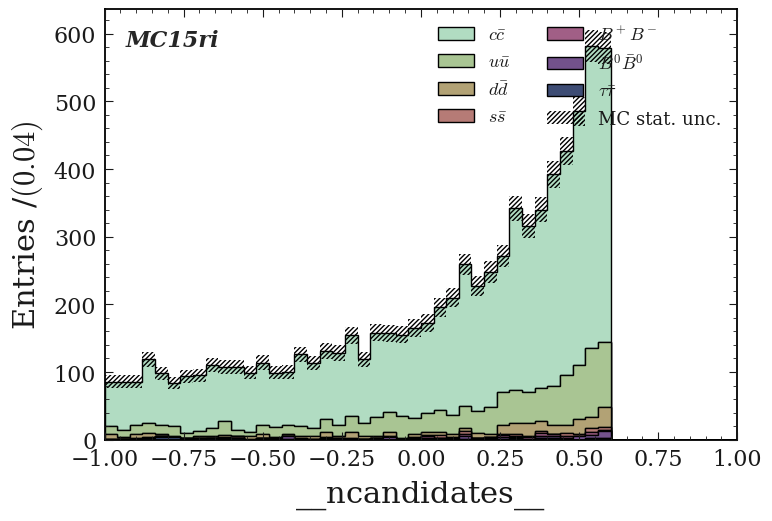

In [277]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'pi0_cos_daughterAngle_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (-1,1)
force_range = (-1,1)
# xrange = (1.8,1.9)

nbins = 50

xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range)
plt.savefig("MC15ri_rho_1ab_optimized_ncandidates.png")

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  2.  2.  1.  0.  4.  3.  1.  3.
  7.  5.  3.  3.  6.  8.  8.  4. 10.  5. 11.  5.  5. 13.]
fitst_bin_entries=0.0


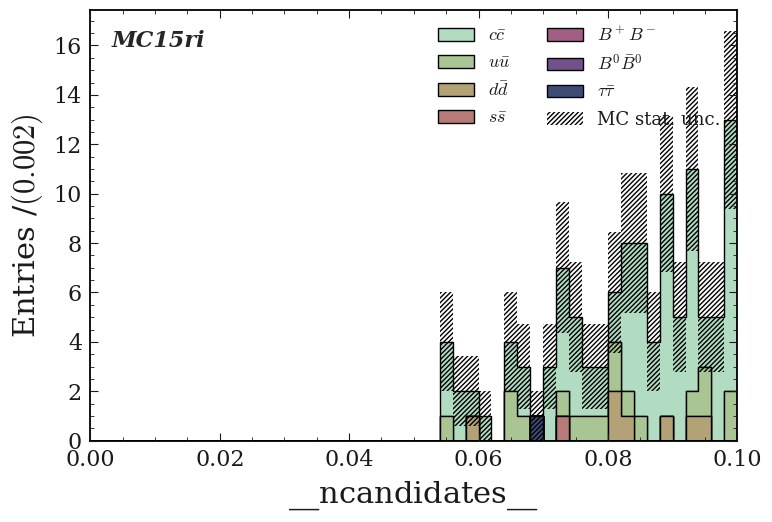

In [279]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Belle2Pi0Veto_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (0,0.1)
force_range = (0,0.1)
# xrange = (1.8,1.9)

nbins = 50

xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range)
plt.savefig("MC15ri_rho_1ab_optimized_ncandidates.png")

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.  893. 1330.  981.  854.
  709.  552.  441.  410.  338.  298.  265.  237.  174.  184.  122.   79.
   56.   14.]
fitst_bin_entries=0.0


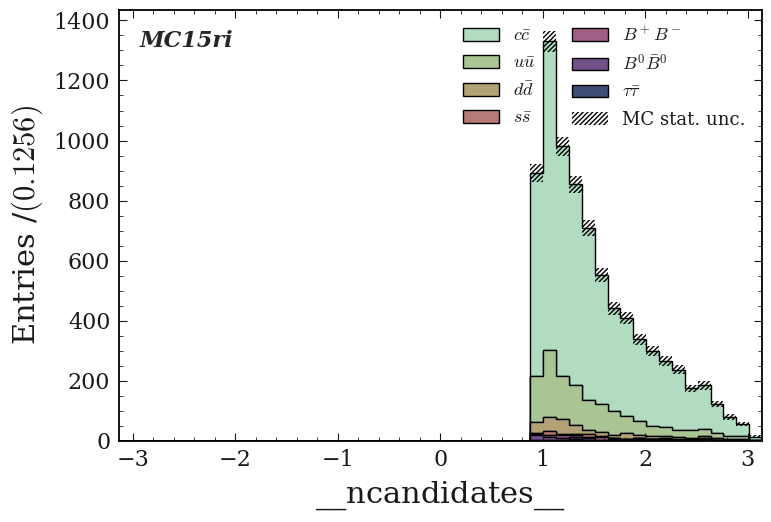

In [280]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'pi0_daughterAngle_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (-3.14,3.14)
# xrange = (0,1)

force_range = (-3.14,3.14)
# force_range = (0,1)

# xrange = (1.8,1.9)

nbins = 50
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range)
plt.savefig("MC15ri_rho_1ab_optimized_ncandidates.png")

[  5.   2.   0.   1.   4.   1.   3.   1.   8.   6.   4.   5.   2.   6.
   5.  10.   7.  10.  18.  12.  17.  15.  16.  22.  25.  39.  51.  67.
  75.  69.  77. 133. 133. 187. 203. 272. 320. 337. 367. 428. 471. 489.
 578. 684. 833. 907. 743. 263.   6.   0.]
fitst_bin_entries=5.0


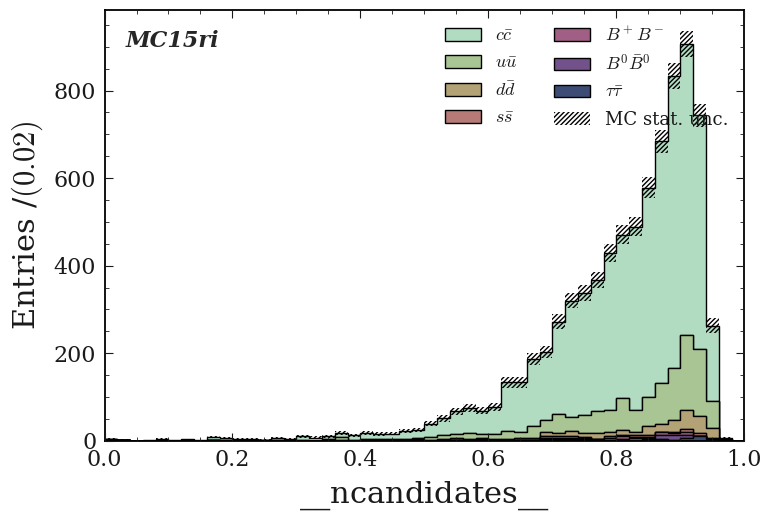

In [281]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'pi0veto_Easym_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (0,1)
force_range = (0,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range)
plt.savefig("MC15ri_rho_1ab_optimized_ncandidates.png")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
fitst_bin_entries=0.0


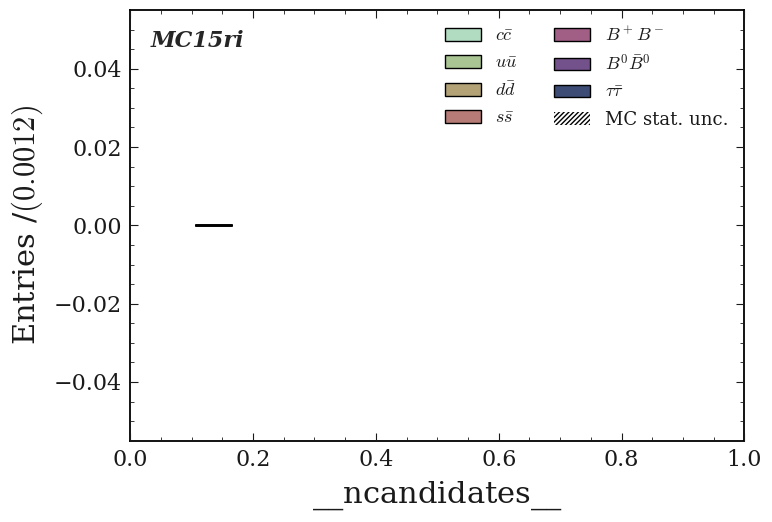

In [282]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'roe_pi0_InvM_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (0.135-0.03,0.135+0.03)
# force_range = (0,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range)
plt.savefig("MC15ri_rho_1ab_optimized_ncandidates.png")

[388. 466. 370. 258. 239. 222. 205. 167. 153. 161. 133. 140. 137. 139.
 114. 122. 110. 110. 108.  91. 112. 105.  90.  94. 109.  97.  78.  92.
  81.  80.  89.  68.  76.  81.  76.  72.  69.  87.  74.  90.  89.  67.
  78.  79.  77.  85.  77.  66.  69.  69.]
fitst_bin_entries=388.0


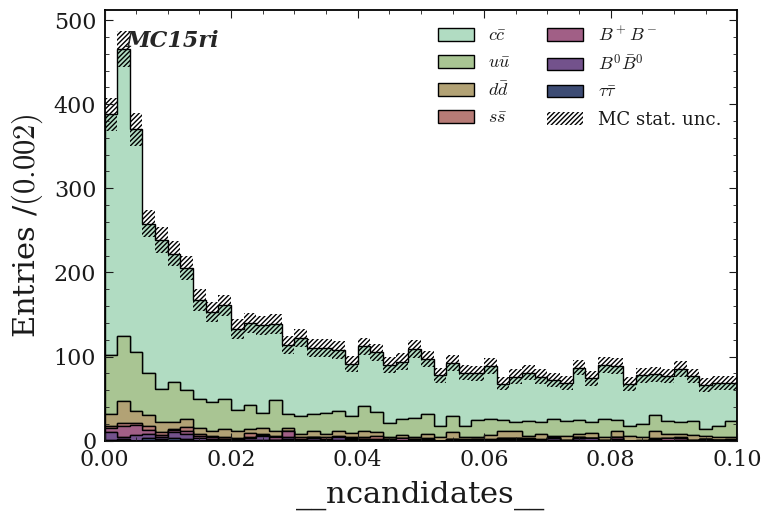

In [246]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_chiProb'

# data  = [pd_taupair[var2]/pd_taupair[var], pd_mixed[var2]/pd_mixed[var], pd_charged[var2]/pd_charged[var],pd_ssbar[var2]/pd_ssbar[var], pd_ddbar[var2]/pd_ddbar[var],pd_uubar[var2]/pd_uubar[var], pd_ccbar[var2]/pd_ccbar[var]]  
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (0,0.1)
# force_range = (0.4,4.2)

# force_range = (0,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range)
plt.savefig("MC15ri_rho_1ab_optimized_ncandidates.png")

[767. 719. 778. 725. 772. 768. 795. 698. 791. 742. 775. 754. 772. 822.
 806. 821. 815. 875. 814. 770. 716. 601. 489. 369. 306. 311. 278. 263.
 244. 237. 248. 239. 234. 258. 226. 232. 196. 219. 191. 200. 207. 173.
 148. 133. 191. 161. 179. 160. 159. 153.]
fitst_bin_entries=767.0


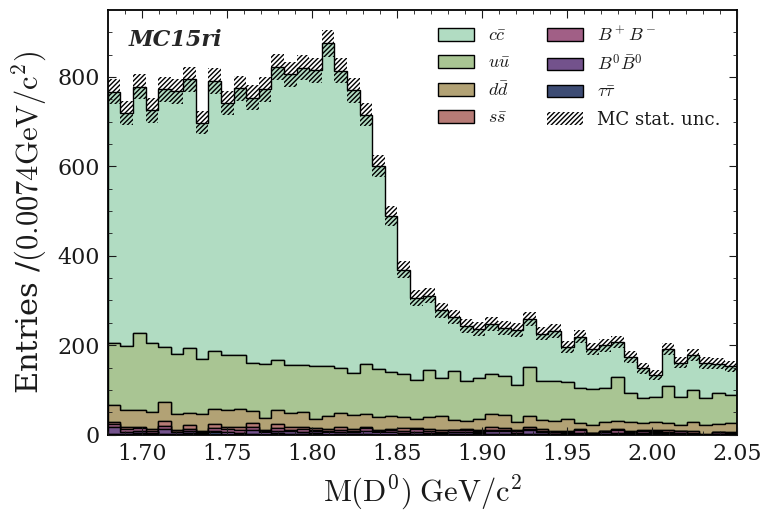

In [239]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")
# plt.savefig("MC15ri_rho_1ab_sig_ext_D0.png")

In [13]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
base_filter+=' && Dstarp_isSignal==1'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)

[ 527.  513.  547.  518.  538.  550.  530.  558.  495.  470.  534.  498.
  497.  539.  575.  603.  626.  704.  797. 1026. 1139. 1352. 1300. 1165.
  881.  607.  410.  284.  222.  234.  239.  233.  207.  225.  216.  217.
  208.  223.  184.  188.  200.  181.  183.  158.  175.  175.  161.  159.
  176.  174.]
fitst_bin_entries=527.0


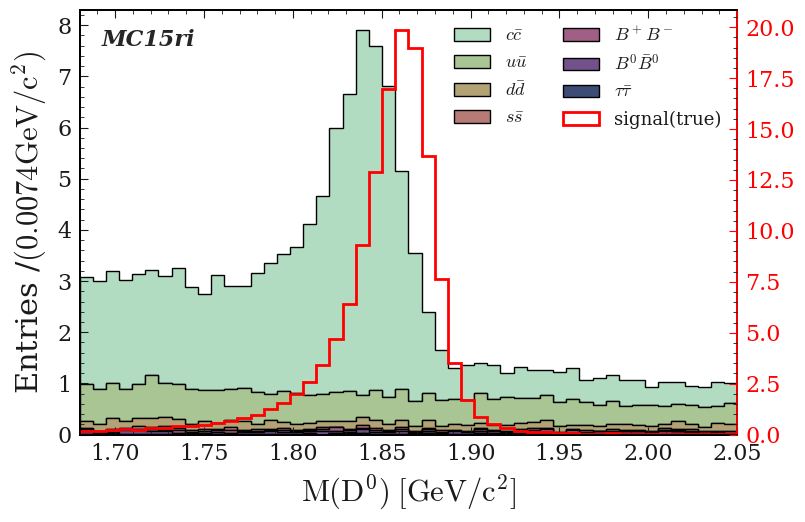

In [14]:
labels = [ r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")



ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')

fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

[  0.   0.   0.   0. 615. 891. 761. 680. 629. 583. 535. 505. 454. 439.
 412. 421. 424. 378. 386. 424. 403. 404. 393. 376. 426. 407. 456. 464.
 455. 434. 505. 475. 512. 498. 491. 521. 479. 447. 459. 421. 411. 413.
 391. 371. 371. 339. 330. 299. 289. 260. 227. 205. 200. 189. 166. 158.
 118.  94. 104.  89.  72.  54.  60.  52.  46.  39.  29.  26.  27.  20.
  16.  12.   9.  14.]
fitst_bin_entries=0.0


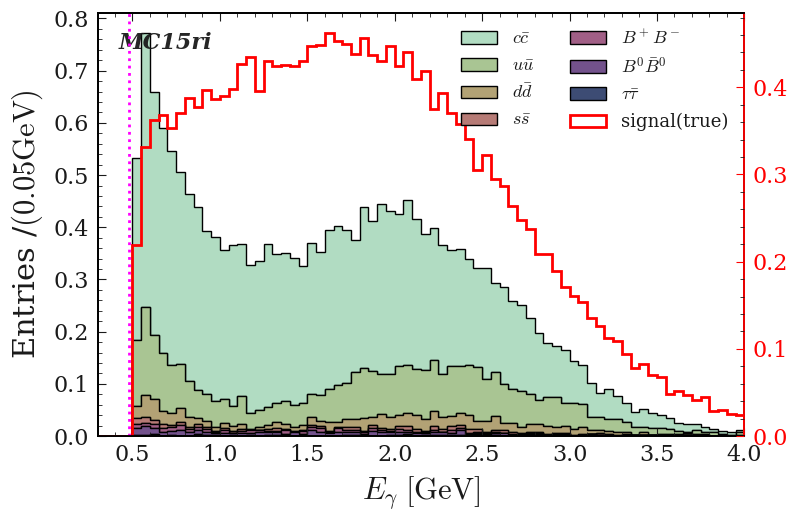

In [128]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'gamma_E'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.3,4.0)
# xrange = (1.8,1.9)
nbins = 74
xlabel = r"$E_{\gamma}$"

fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV")

ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)
plt.savefig("MC15ri_rho_pre_ext_Eg.png")

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0. 3175. 6229. 6303. 5671. 1745.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
fitst_bin_entries=0.0


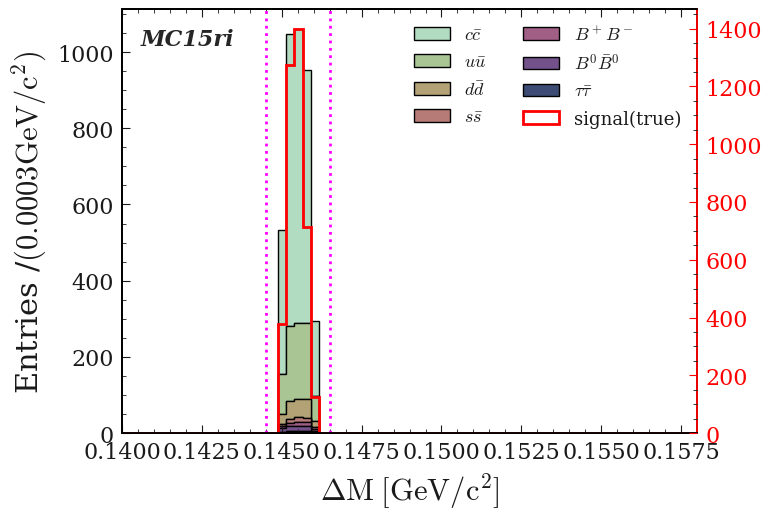

In [129]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.14,0.158)
# xrange = (1.8,1.9)
nbins = 70
xlabel = "$\mathrm{\Delta M}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=(2.0103-1.8648) - 0.001,  color='magenta', linestyle='dotted',lw=2)
plt.axvline(x=(2.0103-1.8648) + 0.001,  color='magenta', linestyle='dotted',lw=2)

plt.tight_layout()
plt.savefig('MC15ri_rho_pre_delM.png')

[67209. 67114. 67059. 66851. 66806. 66998. 66959. 67001. 67462. 66695.
 67567. 68781. 68851. 70071. 71760. 72456. 74864. 76589. 79003. 81184.
 82488. 84344. 85578. 86940. 84217. 81356. 79779. 78793. 76764. 75214.
 73542. 72948. 72095. 70844. 70052. 68797. 68279. 67362. 66870. 66887.
 66474. 66157. 65620. 65136. 65190. 64838.]
fitst_bin_entries=67209.0


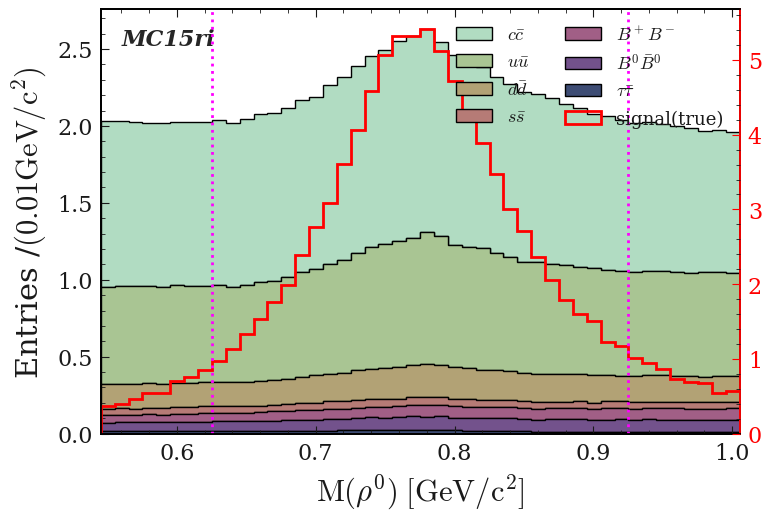

In [15]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Rho_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.77526 - 0.23, 0.77526+0.23)# xrange = (1.8,1.9)
nbins = 46
xlabel = r"$\mathrm{M(\rho^0)}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# plt.axvline(x=0.77526 - 0.125,  color='magenta', linestyle='dotted',lw=2)
# plt.axvline(x=0.77526 + 0.125,  color='magenta', linestyle='dotted',lw=2)

plt.axvline(x=0.77526 - 0.15,  color='magenta', linestyle='dotted',lw=2)
plt.axvline(x=0.77526 + 0.15,  color='magenta', linestyle='dotted',lw=2)

plt.tight_layout()
plt.savefig('MC15ri_rho_pre_Rho_M.png')

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.368e+03 1.349e+03 1.160e+03 1.182e+03
 1.119e+03 1.125e+03 9.960e+02 9.670e+02 8.860e+02 7.930e+02 7.960e+02
 7.030e+02 7.000e+02 6.790e+02 6.480e+02 6.040e+02 5.550e+02 5.140e+02
 5.220e+02 4.420e+02 4.310e+02 4.550e+02 4.460e+02 3.650e+02 3.640e+02
 3.690e+02 3.190e+02 2.940e+02 3.030e+02 2.660e+02 2.620e+02 2.770e+02
 2.300e+02 2.280e+02 1.980e+02 1.920e+02 1.730e+02 1.410e+02 1.410e+02
 1.330e+02 1.020e+02 8.300e+01 7.100e+01 6.800e+01 4.300e+01 3.100e+01
 1.800e+01 9.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]
fitst_bin_entries=0.0


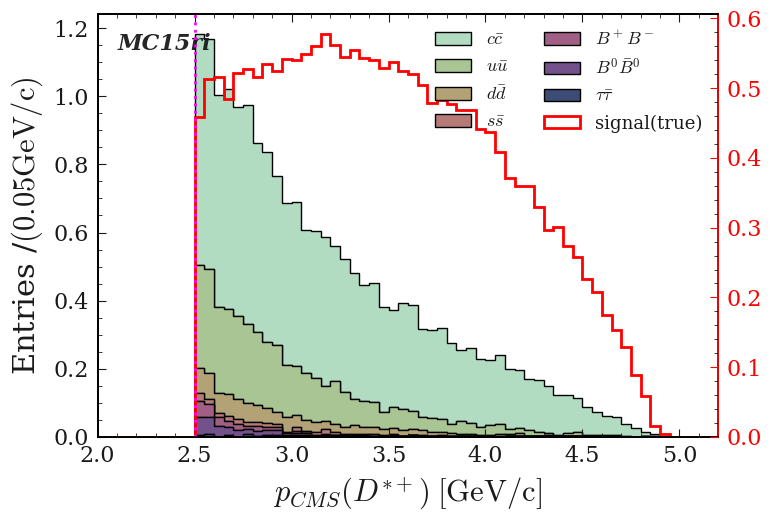

In [130]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_CMS_p'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (2, 5.2)
# xrange = (1.8,1.9)
nbins = 64
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_rho_pre_pCMS.png')

[   6.   93.  228.  353.  616.  769.  948.  983. 1023.  997.  940.  898.
  849.  819.  782.  762.  727.  729.  666.  651.  646.  612.  594.  621.
  602.  567.  590.  581.  629.  600.  615.  618.  649.  720.  774.  728.
  894.  959.  913.  768.  680.  594.  526.  483.  451.  371.  340.  275.
  236.  225.  206.  191.  157.  130.   95.   91.   72.   40.   39.   31.
   29.   14.   17.    9.]
fitst_bin_entries=6.0


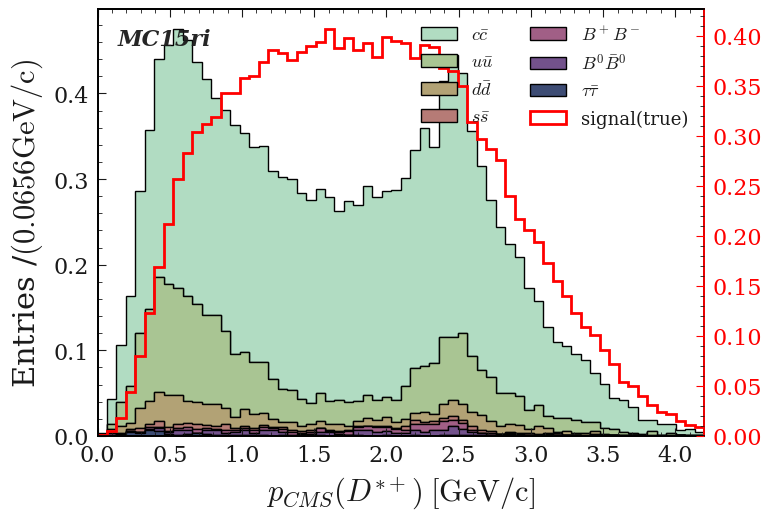

In [240]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Rho_CMS_p'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0, 4.2)
# xrange = (1.8,1.9)
nbins = 64
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 144. 235. 231. 186. 184. 192. 148. 145. 167. 126. 134. 167.
 147. 132. 149. 124. 101. 140. 133. 105. 124. 107. 113. 120. 108. 124.
 107. 113. 108.  99.  87. 103.  88. 113.]
fitst_bin_entries=0.0


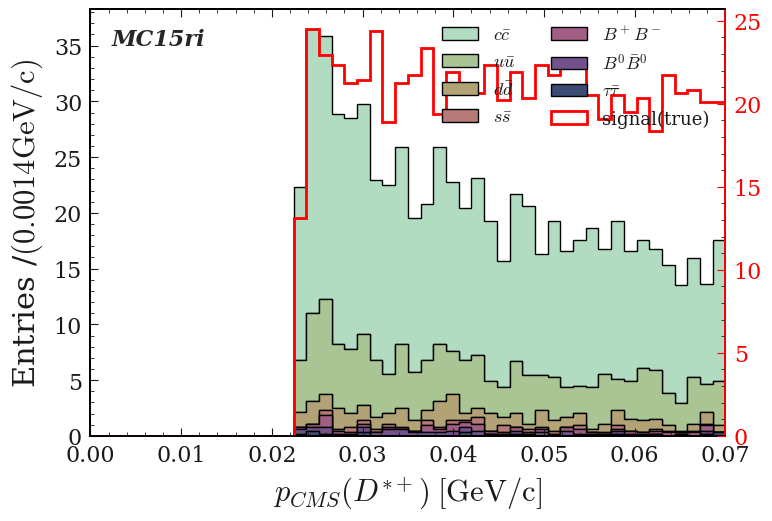

In [131]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Belle2Pi0Veto_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0, 0.07)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[236. 263. 296. 320. 337. 354. 389. 440. 425. 447. 497. 539. 592. 594.
 629. 604. 647. 719. 706. 714. 722. 727. 620. 640. 590. 602. 565. 534.
 508. 472. 470. 389. 396. 352. 332. 332. 304. 268. 258. 239. 242. 205.
 188. 213. 181. 149. 153. 138. 137. 130.]
fitst_bin_entries=236.0


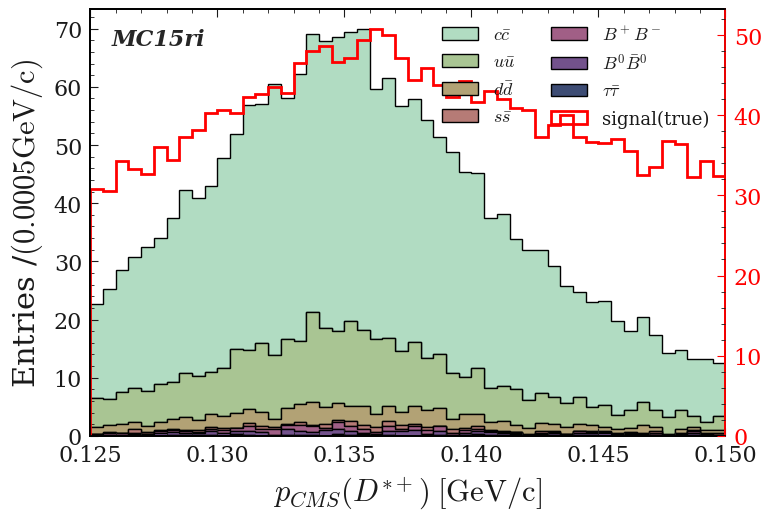

In [242]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'roe_pi0_InvM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.125, 0.150)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[173. 211. 230. 238. 251. 282. 310. 330. 325. 361. 376. 394. 444. 436.
 453. 443. 480. 480. 475. 460. 471. 510. 437. 454. 421. 439. 392. 375.
 347. 377. 327. 268. 267. 252. 245. 225. 214. 199. 182. 170. 164. 139.
 130. 155. 105.  91.  94.  85.  95.  80.]
fitst_bin_entries=173.0


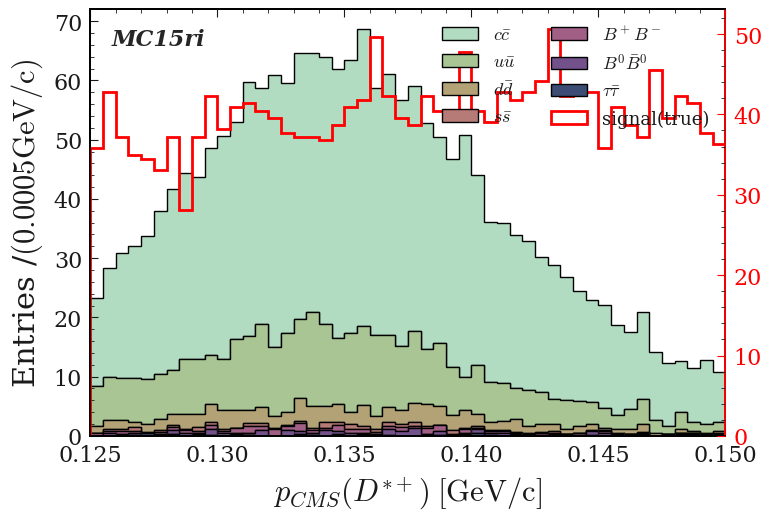

In [243]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'roe_pi0_InvM_50MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.125, 0.150)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[ 796. 1359. 3142. 3742. 3441. 2896. 2288. 1926. 1672. 1479. 1264. 1087.
  944.  763.  717.  626.  527.  481.  390.  363.  315.  295.  237.  206.
  210.  185.  155.  144.  133.  124.  114.  103.   97.   56.   59.   68.
   53.   46.   37.   40.   26.   25.   19.   28.   13.   19.   17.    6.
    5.    5.]
fitst_bin_entries=796.0


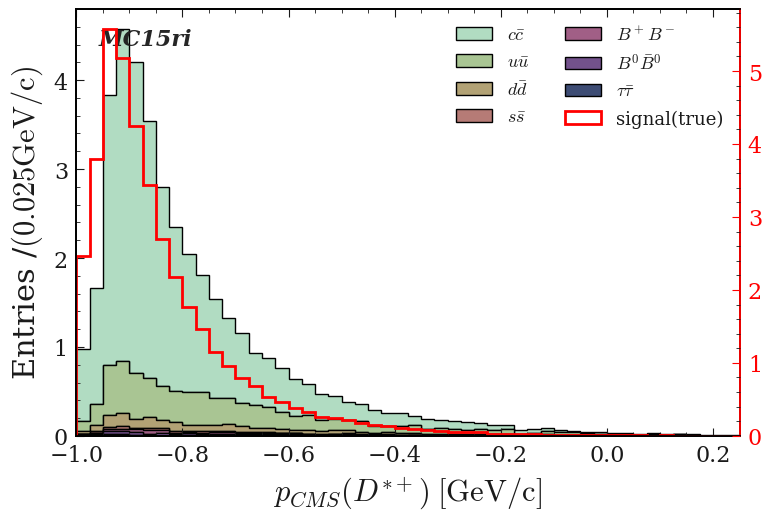

In [244]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'pi0_soft_cosHelicityAngleMomentum_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (-1,0.25)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[  13.   13.   17.    9.   19.   17.   21.   11.   22.   29.   19.   36.
   29.   27.   38.   53.   58.   53.   83.   84.   84.  100.  114.  134.
  140.  165.  208.  243.  252.  272.  338.  427.  468.  563.  603.  754.
  879.  977. 1044. 1182. 1277. 1385. 1596. 1864. 2243. 2434. 2026.  688.
   12.    0.]
fitst_bin_entries=13.0


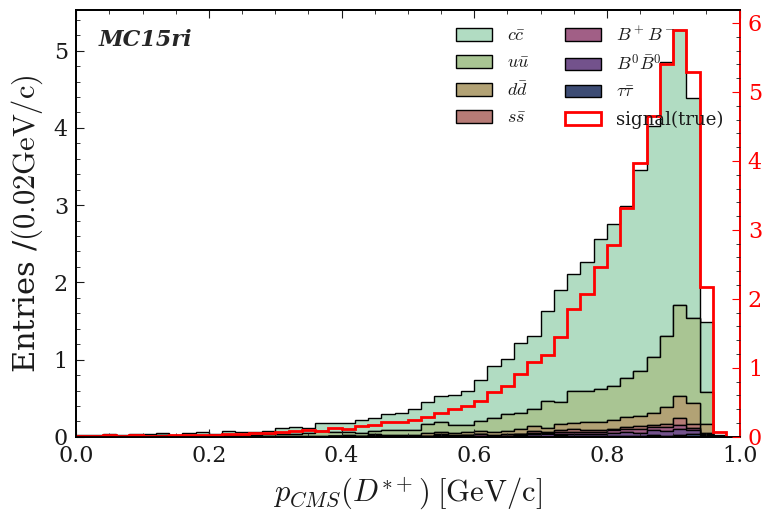

In [132]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'pi0veto_Easym_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0,1)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[919. 943. 940. 917. 923. 785. 775. 654. 628. 576. 503. 482. 439. 379.
 363. 319. 316. 282. 290. 253. 206. 212. 220. 175. 172. 162. 157. 156.
 134. 137. 131. 130. 146. 123. 121. 110. 102.  95.  95. 105.  83.  84.
  72.  91.  81.  81.  70.  68.  63.  46.  59.  70.  37.  49.  38.  39.
  39.  43.  37.  32.]
fitst_bin_entries=919.0


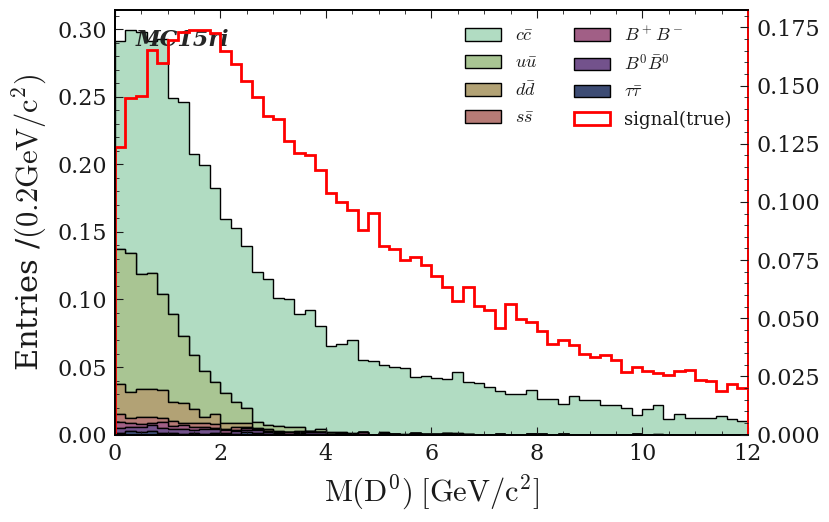

In [133]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  

var = 'D0_flightDistanceErr'
var2 = 'D0_flightDistance'

data  = [pd_taupair[var2]/pd_taupair[var], pd_mixed[var2]/pd_mixed[var], pd_charged[var2]/pd_charged[var],pd_ssbar[var2]/pd_ssbar[var], pd_ddbar[var2]/pd_ddbar[var],pd_uubar[var2]/pd_uubar[var], pd_ccbar[var2]/pd_ccbar[var]]  

scale = 1
xrange = (0.0,12)
# xrange = (1.8,1.9)
nbins = 60
xlabel = "$\mathrm{M(D^0)}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")



pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var2]/pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [ ]:
#labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
# labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# xrange = (1.68, 2.05)
# xbins = np.linspace(*xrange,51)
# colors=b2helix(len(labels))
# data_list=dict()
# signal_variables = ["D0_M"]
# scale = 0.5

# for var in signal_variables:
# #     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     print(var)
#     mixed_bkg = {var : pd_mixed[var] }
#     charged_bkg = {var : pd_charged[var] }
#     ccbar_bkg = {var : pd_ccbar[var] }
#     uubar_bkg = {var : pd_uubar[var] }
#     ddbar_bkg = {var : pd_ddbar[var] }
#     ssbar_bkg = {var : pd_ssbar[var] }
#     taupair_bkg = {var : pd_taupair[var] }
    
    
#     #print(mixed_bkg)
# #     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     # data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  

#     weights = make_data_weight(data, scale)
# #     for labeling in labels:

    
#     plt.hist(data, bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black', weights = weights)
    
# #     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
#     ax = plt.gca()
#     ax.bar(
#                 x = bin_mids,
#                 height=2 * np.sqrt(sum_w2),
#                 width=bin_width,
#                 bottom=sum_w - np.sqrt(sum_w2),
#                 color="black",
#                 hatch="///////",
#                 fill=False,
#                 lw=0,
#                 label="MC stat. unc."    
#     )
#     # Shrink current axis by 20%
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width , box.height])

#     # Put a legend to the right of the current axis
#     # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend(loc='upper right',prop={'size':13}, ncol = 2)
        
#     watermark(t="",logo="MC15ri")
# #     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

#     n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

#     ax.set_xlim(*xrange)
#     ax.set_ylim(0,sum_w[0]*1.2)
#     # ax.set_ylim(0,600)

#     plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
#     width = xe[1]-xe[0]
#     plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
#     plt.show()
#     plt.clf()

In [13]:
pd_all = pd.concat([pd_ccbar,
                    pd_uubar,
                    pd_ddbar,
                    pd_ssbar,
                    pd_charged,
                    pd_mixed,
                    pd_taupair], ignore_index=True)

In [14]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, cut):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = cut + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [15]:
def calculate_eff( bkg_pd, sig_pd, cut_list, cut):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut = cut + str(cut_value) 

        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6)
        eff_list.append(eff)    
    
    return eff_list

In [16]:
def calculate_purity( bkg_pd, sig_pd, cut_list, cut):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut =  cut +  str(cut_value) 
        
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dstarp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [135]:
# import numpy as np
# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# X, Y, Z = np.mgrid[-1:1:11j, -1:1:11j, -1:1:11j]

# # T = np.exp(-X**2 - Y**2 - Z**2)
# T = X**2 + Y**2 + Z**2

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.5)
# # scat = ax.scatter(X, Y, Z, c=data_list, alpha=0.5)

# fig.colorbar(scat, shrink=0.5, aspect=5)
# plt.tight_layout()

In [19]:
def calculate_FOM_3D(bkg_pd, sig_pd, grid_list, scale_factor, cut_x, cut_y, cut_z):
 
    FOM_list = list()
    
    for points_3d in grid_list:
        
        points_3d_x, points_3d_y, points_3d_z =  points_3d[0], points_3d[1], points_3d[2]
    
        temp_cut = cut_x + str(points_3d_x) + ' & ' +  cut_y + str(points_3d_y) + ' & ' + cut_z + str(points_3d_z) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)    
        
        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        # print(FOM)
        FOM_list.append(FOM)    
        
    return FOM_list

In [108]:
# base_file_loc = '/media/jykim/T7/storage/01_recon/v26_sigbkg_pre_ext/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlysig/'

sigMC_file_loc = base_file_loc + 'topo/resultfile/result_rho/standard.root'

# base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.001'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter='D0_M>1.8 && D0_M<1.9 '
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && Dstarp_CMS_p>2.5'

base_filter += '&& nSigCascDcyBr_0==0'
base_filter += '&& Dstarp_isSignal==1'

# base_filter += '&& gamma_E>0.48'

# variables=['D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','gamma_E']
tree='rho'

pd_phigamma_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)
print(len(pd_phigamma_sigMC))

1104


In [102]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
half_1_sigMC = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'

base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter='D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && Dstarp_CMS_p>2.5'
base_filter += '&& Dstarp_isSignal==1'

# base_filter += '&& gamma_E>0.48'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


scale_factor = len(pd_phigamma_sigMC)/len(pd_half_1_sigMC )
print(scale_factor)

0.005494819333538961


In [103]:
X, Y, Z = np.mgrid[0.3:0.8:51j, 0.005:0.030:26j, 0.0004:0.001:13j]
a = zip(X.ravel(), Y.ravel(), Z.ravel())
A_list = list(a)

grid_list = A_list
cut_x = 'gamma_E > '
cut_y = 'Belle2Pi0Veto_75MeV > '
cut_z = 'abs(Dstarp_delM - 0.1455) < '

scale_factor=scale_factor

FOM_phig_list = calculate_FOM_3D(pd_all,pd_half_1_sigMC, grid_list ,scale_factor, cut_x,  cut_y, cut_z )


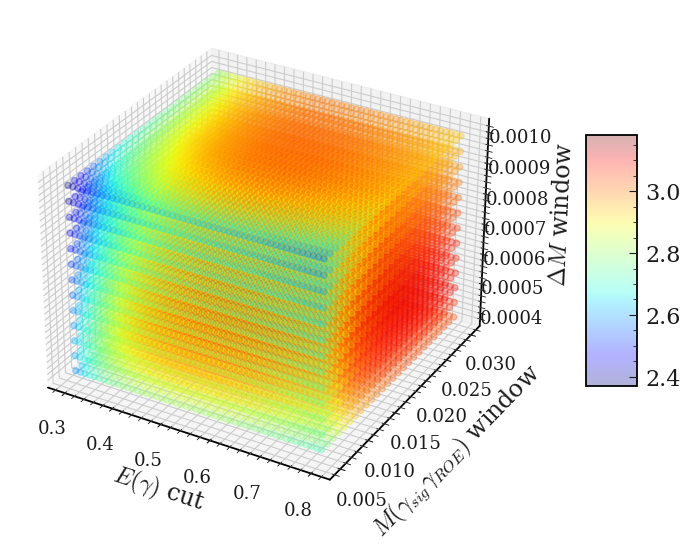

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.5)
scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.3, cmap = 'jet')
# scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5)

fig.colorbar(scat, shrink=0.5, aspect=5 , pad = 0.1)

ax.set_xlabel(r'$E(\gamma)$ cut',fontsize=17)
ax.set_ylabel(r'$M(\gamma_{sig}\gamma_{ROE})$ window',fontsize=17)
ax.set_zlabel(r'$\Delta M$ window',fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=13)

# ax.ticklabel_format(axis = 'z',  style='sci', scilimits = (0,1))
# ax.dist = 10
ax.xaxis.labelpad=8
ax.yaxis.labelpad=12
ax.zaxis.labelpad=13.5


plt.tight_layout()
plt.savefig('test.png')

plt.show()

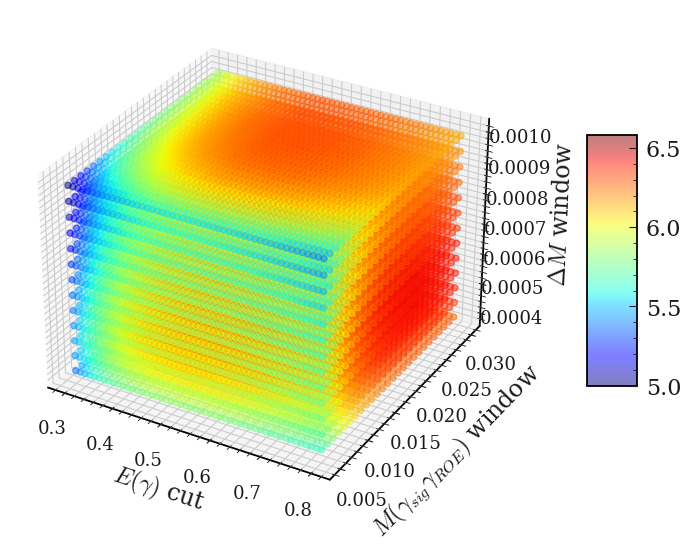

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.5)
scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5, cmap = 'jet')
# scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5)

fig.colorbar(scat, shrink=0.5, aspect=5 , pad = 0.1)

ax.set_xlabel(r'$E(\gamma)$ cut',fontsize=17)
ax.set_ylabel(r'$M(\gamma_{sig}\gamma_{ROE})$ window',fontsize=17)
ax.set_zlabel(r'$\Delta M$ window',fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=13)

# ax.ticklabel_format(axis = 'z',  style='sci', scilimits = (0,1))
# ax.dist = 10
ax.xaxis.labelpad=8
ax.yaxis.labelpad=12
ax.zaxis.labelpad=13.5


plt.tight_layout()
plt.savefig('test.png')

plt.show()

In [107]:
max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=3.18284281786272, cut value=(0.52, 0.023000000000000003, 0.0005)


In [40]:
max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=6.583635322051595, cut value=(0.52, 0.023000000000000003, 0.0005)


In [51]:
# FOM_phig_list

In [33]:
# ravel()는 짝 펴주는 메소드, view
## (x,y)로 점을 찍고 싶을 때 사용
a = zip(X.ravel(), Y.ravel(), Z.ravel())
A_list = list(a)


In [25]:
# A_list

In [20]:
def plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )

    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")

    
    lns = [p1, p2]
    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    # par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())

    plt.title(r'$D^0 \to \rho^0 \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [21]:
def plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()
    par2 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )
    par2.set_ylim(0.958,0.97 )

    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")
    par2.set_ylabel("Purity")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
    p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

    
    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    plt.title(r'$D^0 \to \rho^0 \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [123]:
# base_file_loc = '/media/jykim/T7/storage/01_recon/v26_sigbkg_pre_ext/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlysig/'

sigMC_file_loc = base_file_loc + 'topo/resultfile/result_rho/standard.root'

# base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.001'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter='D0_M>1.8 && D0_M<1.9 '
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'

base_filter += '&& nSigCascDcyBr_0==0'
# base_filter += '&& gamma_E>0.48'

# variables=['D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','gamma_E']
tree='rho'

pd_phigamma_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)
print(len(pd_phigamma_sigMC))

518


In [124]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
half_1_sigMC = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'

base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter='D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter += '&& gamma_E>0.48'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


scale_factor = len(pd_phigamma_sigMC)/len(pd_half_1_sigMC )
print(scale_factor)

0.0064198693717699255


max=2.887394275978181, cut value=0.52


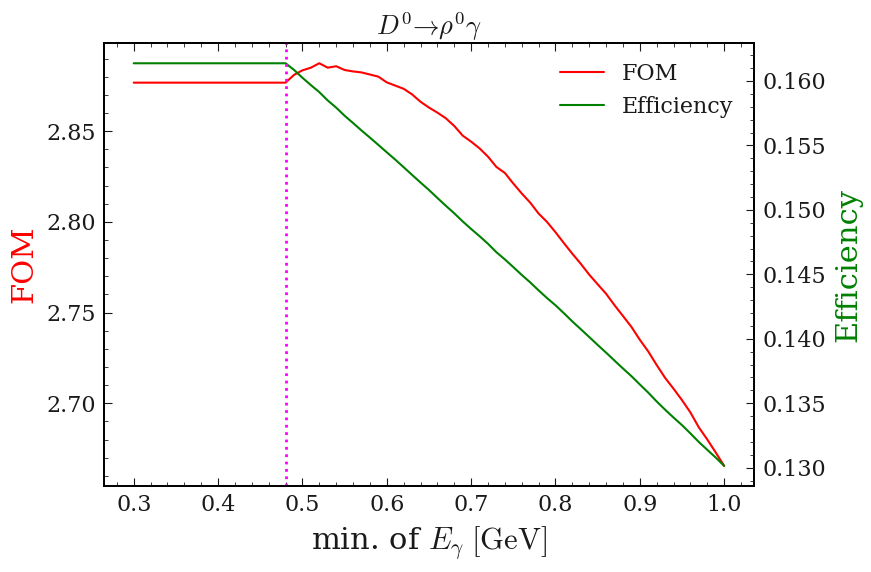

In [125]:
FOM_cut_list = np.linspace(0.3,1.0,71)
cut = 'gamma_E > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")




max=2.8912331614237647, cut value=-0.4733333333333333


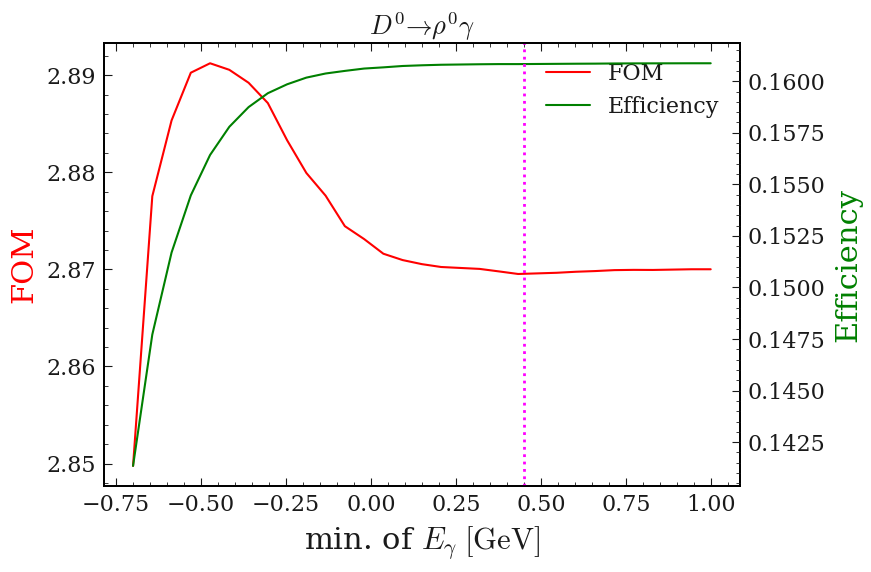

In [126]:
FOM_cut_list = np.linspace(-0.7,1,31)
cut = 'pi0_soft_cosHelicityAngleMomentum_75MeV < '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=2.8862631332212296, cut value=0.4


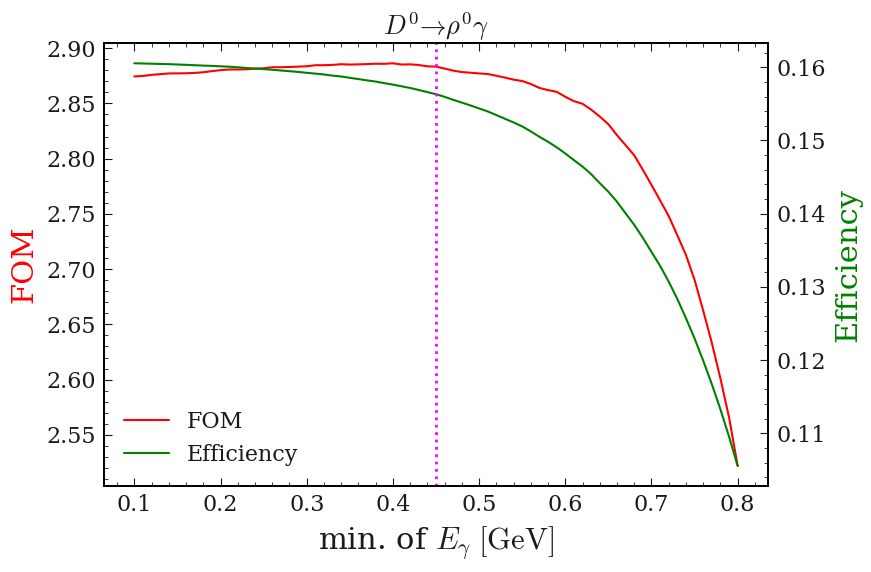

In [127]:
FOM_cut_list = np.linspace(0.1,0.8,71)
cut = 'pi0veto_Easym_75MeV > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=2.919990908648631, cut value=0.5235


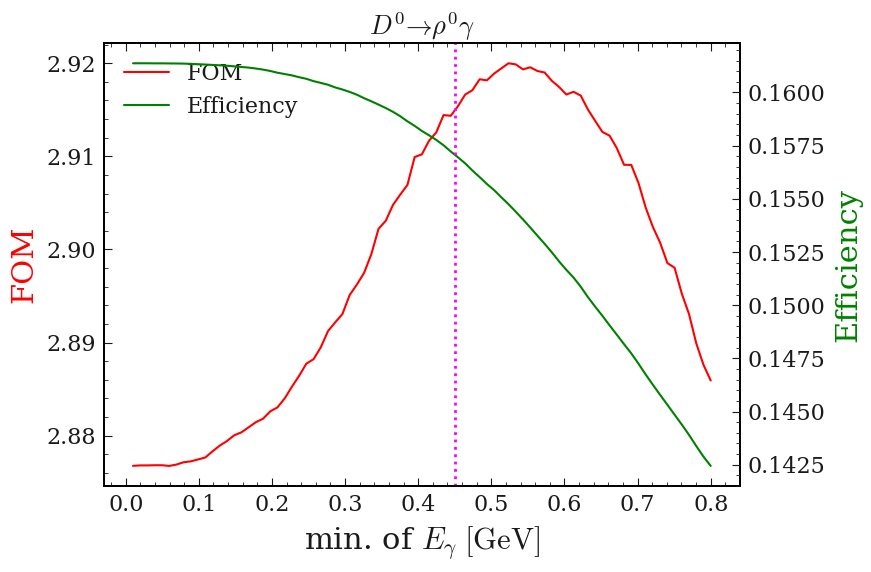

In [128]:
FOM_cut_list = np.linspace(0.01,0.8,81)
cut = 'Rho_p >  '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=2.9055332667080207, cut value=0.5873076923076923


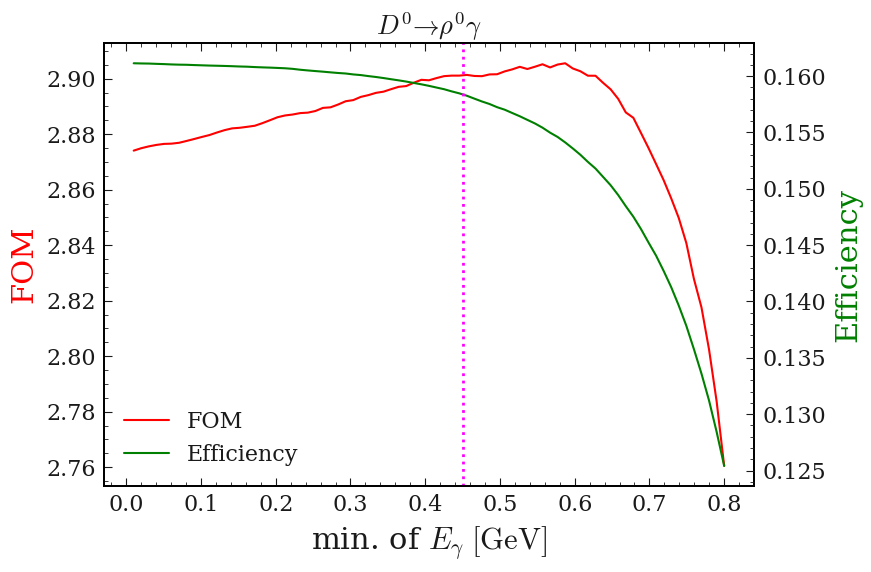

In [129]:
FOM_cut_list = np.linspace(0.01,0.8,79)
cut = 'pi0veto_Easym_50MeV > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=3.6334806541787312, cut value=0.028999999999999998


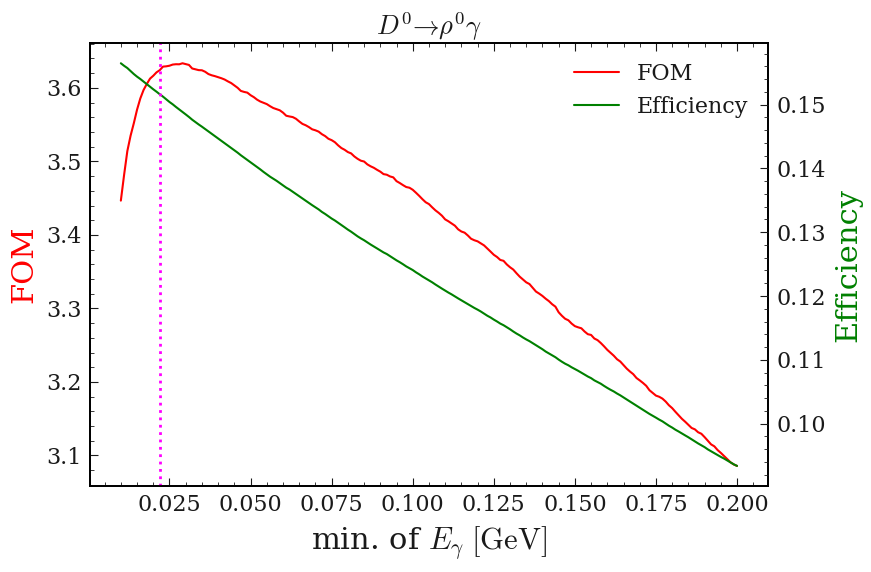

In [130]:
FOM_cut_list = np.linspace(0.01,0.2,191)
cut = 'Belle2Pi0Veto_75MeV > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.022,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=3.853738203128299, cut value=0.03


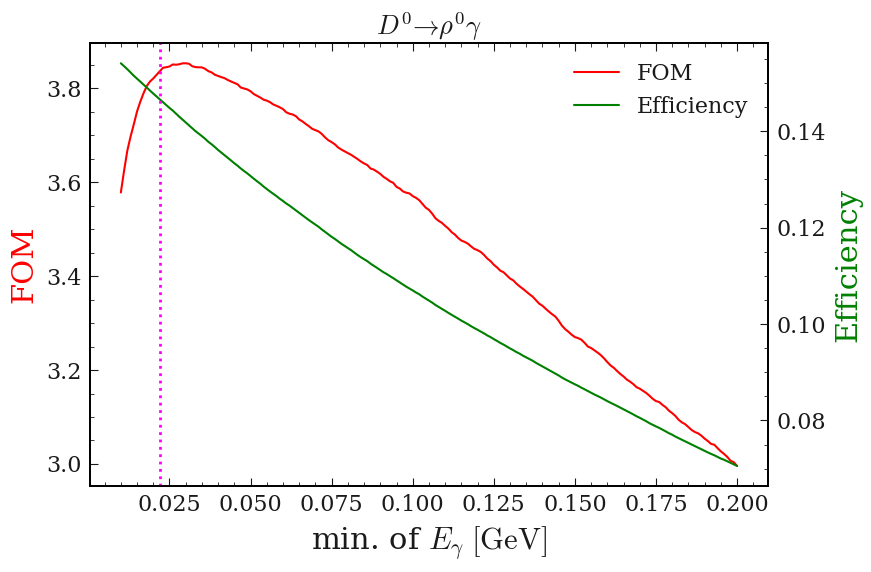

In [131]:
FOM_cut_list = np.linspace(0.01,0.2,191)
cut = 'Belle2Pi0Veto_50MeV > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.022,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=3.789806937330333, cut value=0.031


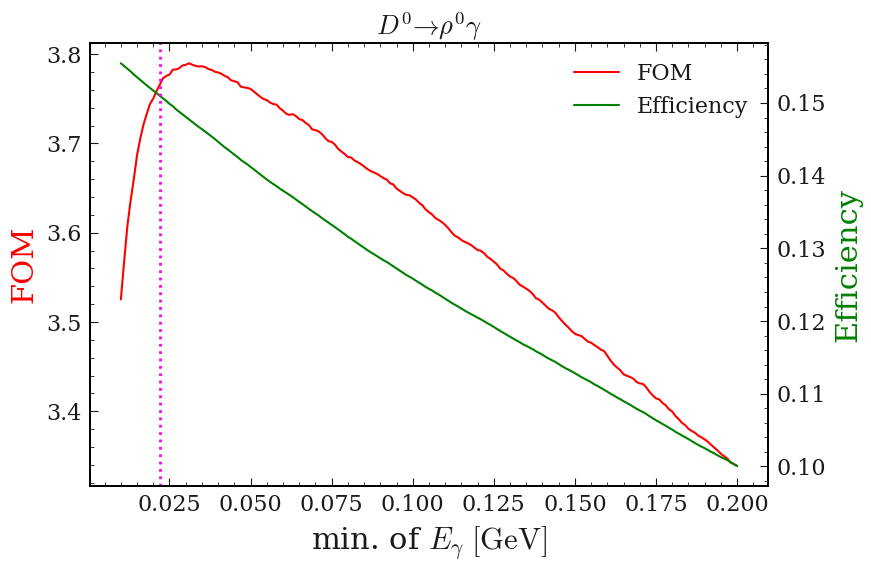

In [132]:
FOM_cut_list = np.linspace(0.01,0.2,191)
cut = 'Belle2Pi0Veto_mask > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.022,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))